# Landfast Sea Ice, Mahoney

This curation notebook is for Andy Mahoney's Landfast Sea Ice data set. Currently, these data are found in `/workspace/CKAN/CKAN_Data/InteRFACE/Beaufort/` and `.../Chukchi/`.

This notebook assumes that these data are copied to `$SCRATCH_DIR`. Here is the directory structure without any files displayed:

In [35]:
!tree $SCRATCH_DIR/ -d

/atlas_scratch/kmredilla/ardac/landfast_seaice/
├── Beaufort
│   ├── 1998-99
│   │   └── Mosaics_1998-99
│   ├── 1999-00
│   │   └── Mosaics_1999-00
│   ├── 2000-01
│   │   └── Mosaics_2000-01
│   ├── 2001-02
│   │   └── Mosaics_2001-02
│   │       ├── NotUsed
│   │       ├── PrudhoeBay
│   │       └── Unused
│   ├── 2002-03
│   │   └── Mosaics_2002-03
│   ├── 2003-04
│   │   └── Mosaics_2003-04
│   ├── 2004-05
│   ├── 2005-06
│   ├── 2006-07
│   ├── 2007-08
│   └── AllSeasonsAnalysis
│       ├── MonthlySLIEs
│       │   ├── ASCII_Data
│       │   │   └── mean
│       │   ├── ASCII_geocoords
│       │   │   ├── Shapefiles
│       │   │   └── WithHeaders
│       │   └── MinMeanMax
│       │       └── ASCIIGeoCoords_AKAlb
│       └── SLIE_Events
└── Chukchi
    ├── 1996-97
    ├── 1997-98
    ├── 1998-99
    ├── 1999-00
    ├── 2000-01
    ├── 2001-02
    ├── 2002-03
    ├── 2003-04
    ├── 2004-05
    ├── 2005-06
    ├── 2006-07
    ├── 2007-08
    └── AllSeasonsAnalysis
        ├── Mon

So not all things are equal between the Beaufort and Chukchi regions, as there appear to be "mosaics" for many years in the Beaufort region. Which don't show up in the Chukchi region. And this difference is evident in the `.tif` file naming, too:

In [36]:
!tree $SCRATCH_DIR/Beaufort/1998-99/Mosaics_1998-99/

/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/1998-99/Mosaics_1998-99/
├── r1999_024-026_mos.tif
├── r1999_034-036_mos.tif
├── r1999_042-046_mos.tif
├── r1999_054-056_mos.tif
├── r1999_064-066_mos.tif
├── r1999_073-075_mos.tif
├── r1999_084-087_mos.tif
├── r1999_094-097_mos.tif
├── r1999_104-108_mos.tif
├── r1999_114-116_mos.tif
├── r1999_125-128_mos.tif
├── r1999_134-136_mos.tif
├── r1999_144-146_mos.tif
├── r1999_154-156_mos.tif
├── r1999_162-166_mos.tif
├── r1999_174-176_mos.tif
├── r1999_184-186_mos.tif
├── r1999_194-197_mos.tif
└── r1999_210-212_mos.tif

0 directories, 19 files


In [37]:
!tree $SCRATCH_DIR/Chukchi/1998-99/

/atlas_scratch/kmredilla/ardac/landfast_seaice/Chukchi/1998-99/
├── lfiw.csv
├── lfiw_moregmean.csv
├── lfiw_moregstdev.csv
├── lfiw_regmean.csv
├── lfiw_regstdev.csv
├── r1998_277-301_slie.tif
├── r1998_286-311_slie.tif
├── r1998_300-325_slie.tif
├── r1998_310-335_slie.tif
├── r1998_324-349_slie.tif
├── r1998_334-353_slie.tif
├── r1998_345-362_slie.tif
├── r1998_351-008_slie.tif
├── r1998_359-018_slie.tif
├── r1999_007-027_slie.tif
├── r1999_017-034_slie.tif
├── r1999_024-042_slie.tif
├── r1999_032-056_slie.tif
├── r1999_041-066_slie.tif
├── r1999_055-076_slie.tif
├── r1999_065-090_slie.tif
├── r1999_075-100_slie.tif
├── r1999_089-104_slie.tif
├── r1999_100-114_slie.tif
├── r1999_103-128_slie.tif
├── r1999_113-137_slie.tif
├── r1999_124-145_slie.tif
├── r1999_133-154_slie.tif
├── r1999_144-162_slie.tif
├── r1999_152-173_slie.tif
├── r1999_161-186_slie.tif
├── r1999_172-195_slie.tif
├── r1999_185-207_slie.tif
├── sliedatenum.csv
├── sliedatestr.csv
├── SLIEstack_1998-99_col.tif
├── SLI

As well as with the inclusion of different files. 

What do the non-mosaic Beaufort folders look like?

In [38]:
!tree $SCRATCH_DIR/Beaufort/2004-05

/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2004-05
├── lfiw.csv
├── lfiw_moregmean.csv
├── lfiw_moregstdev.csv
├── lfiw_regmean.csv
├── lfiw_regstdev.csv
├── r2004_276-304_slie.tif
├── r2004_286-315_slie.tif
├── r2004_300-328_slie.tif
├── r2004_313-336_slie.tif
├── r2004_324-345_slie.tif
├── r2004_334-352_slie.tif
├── r2004_343-360_slie.tif
├── r2004_348-010_slie.tif
├── r2004_358-017_slie.tif
├── r2005_006-027_slie.tif
├── r2005_015-041_slie.tif
├── r2005_025-051_slie.tif
├── r2005_039-058_slie.tif
├── r2005_049-065_slie.tif
├── r2005_054-075_slie.tif
├── r2005_063-089_slie.tif
├── r2005_073-099_slie.tif
├── r2005_087-113_slie.tif
├── r2005_097-123_slie.tif
├── r2005_111-128_slie.tif
├── r2005_120-137_slie.tif
├── r2005_126-152_slie.tif
├── r2005_135-161_slie.tif
├── r2005_150-168_slie.tif
├── r2005_157-178_slie.tif
├── r2005_166-190_slie.tif
├── r2005_174-195_slie.tif
├── r2005_188-211_slie.tif
├── sliedatenum.csv
├── sliedatestr.csv
├── SLIEdgestack_2004-05.tif
├── SLIE

Ah, so this small subset of the Beaufort data, winters beginning with 2004-2007, seem to match the structure of all years of the Chukchi data.

### SLIE v Mosaic

There seem to be two main types of data here: "SLIE", which [most likely](https://doi.org/10.1029/2006JC003559) stands for Seaward Landfast Ice Edge, and "Mosaics". 

How do the `mos` files differ from the `_slie` files for the Beaufort region?

In [1]:
# this might be an issue with anaconda-project, but the 
# GDAL_DATA and PROJ_LIB env vars are not set when the 
# environment is activated if they are already set in 
# the parent conda env. Set them here before importing
import os
env_path = "envs/default/share/"
os.environ["PROJ_LIB"] = f"{env_path}/proj"
os.environ["GDAL_DATA"] = f"{env_path}/gdal"

from pathlib import Path
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

scratch_dir = Path(os.getenv("SCRATCH_DIR"))

Mosaic data for 1998-99:

Beaufort 'mosaic' sample file: /atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/1998-99/Mosaics_1998-99/r1999_034-036_mos.tif
metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 9554, 'height': 3298, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(100.0, 0.0, -236180.0,
       0.0, -100.0, 2509919.0)}


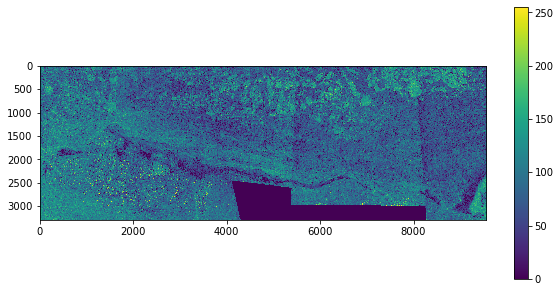

Unique values:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 24

In [6]:
temp_fp = list(scratch_dir.glob("Beaufort/1998-99/Mosaics_1998-99/r*.tif"))[1]

with rio.open(temp_fp) as src:
    temp_arr = src.read(1)
    
print("Beaufort 'mosaic' sample file:", temp_fp)
print("metadata:", src.meta)

plt.figure(figsize=(10, 5))
plt.imshow(temp_arr, interpolation="none")
plt.colorbar()
plt.show()

print("Unique values:\n", np.unique(temp_arr))

SLIE data for 2004-05:

Beaufort 'slie' sample file: /atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2004-05/r2004_276-304_slie.tif
metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 9554, 'height': 3298, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(100.0, 0.0, -236250.00688041828,
       0.0, -100.0, 2509950.007233796)}


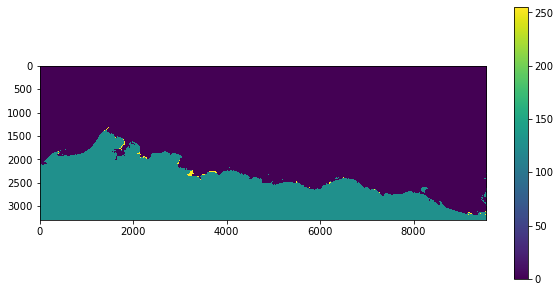

Unique values:
 [  0 128 255]


In [8]:
temp_fp = list(scratch_dir.glob("Beaufort/2004-05/r*.tif"))[0]

with rio.open(temp_fp) as src:
    temp_arr = src.read(1)
    
print("Beaufort 'slie' sample file:", temp_fp)
print("metadata:", src.meta)

plt.figure(figsize=(10, 5))
plt.imshow(temp_arr, interpolation="none")
plt.colorbar()
plt.show()

print("Unique values:\n", np.unique(temp_arr))

So these data are indeed fundamentally different. 

SLIE at least is clearly showing the AK coastline and seems to be a binary variable, where 0 indicates no SLIE, 128 indicates SLIE, and 255 indicates landmask. Mosaic data appears to be an integer-valued variable with maximum of 255.

Based on the metadata, these data are on grids of the same size: 9554x3298. But according to the affine transforms, while they have the same resolution of 100m, they have only slightly different centerpoints:

In [ ]:
temp_fps = [
    list(scratch_dir.glob("Beaufort/1998-99/Mosaics_1998-99/r*.tif"))[1],
    list(scratch_dir.glob("Beaufort/2004-05/r*.tif"))[0]
]

for fp in temp_fps:
    with rio.open(fp) as src:
        print(src["

Beaufort 'slie' sample file: /atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2005-06/r2005_303-322_slie.tif
metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 9554, 'height': 3298, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(100.0, 0.0, -236250.00688041828,
       0.0, -100.0, 2509950.007233796)}


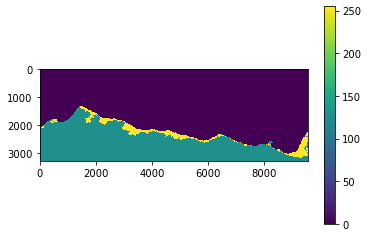

In [41]:
temp_fp = list(scratch_dir.glob("Beaufort/2005-06/r*.tif"))[0]

with rio.open(temp_fp) as src:
    temp_arr = src.read(1)
    
print("Beaufort 'slie' sample file:", temp_fp)
print("metadata:", src.meta)

plt.imshow(temp_arr, interpolation="none")
plt.colorbar()
plt.show()

In [44]:
np.unique(temp_arr)

array([  0, 128, 255], dtype=uint8)

This is how the data are organized, GeoTIFFs of sea ice concentration for multi-day periods recorded every ~10 days, grouped by winter season.

In [26]:
ls $SCRATCH_DIR/Beaufort/1998-99/Mosaics_1998-99/

r1999_024-026_mos.tif*  r1999_094-097_mos.tif*  r1999_162-166_mos.tif*
r1999_034-036_mos.tif*  r1999_104-108_mos.tif*  r1999_174-176_mos.tif*
r1999_042-046_mos.tif*  r1999_114-116_mos.tif*  r1999_184-186_mos.tif*
r1999_054-056_mos.tif*  r1999_125-128_mos.tif*  r1999_194-197_mos.tif*
r1999_064-066_mos.tif*  r1999_134-136_mos.tif*  r1999_210-212_mos.tif*
r1999_073-075_mos.tif*  r1999_144-146_mos.tif*
r1999_084-087_mos.tif*  r1999_154-156_mos.tif*


Here are some examples of what the data and metadata look like, for Chukchi:

Chukchi sample file: /atlas_scratch/kmredilla/ardac/landfast_seaice/Chukchi/1998-99/r1998_310-335_slie.tif
metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 6234, 'height': 6271, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(100.0, 0.0, -859401.4481000006,
       0.0, -100.0, 2423189.104800001)}


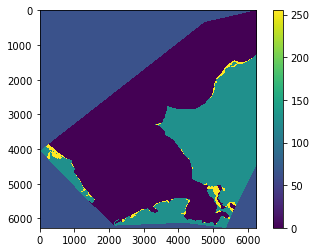

In [23]:
temp_fp = list(scratch_dir.glob("Chukchi/1998-99/r*.tif"))[0]

with rio.open(temp_fp) as src:
    chukchi_arr = src.read(1)
    
print("Chukchi sample file:", temp_fp)
print("metadata:", src.meta)

plt.imshow(chukchi_arr, interpolation="none")
plt.colorbar()
plt.show()

And Beaufort:

Beaufort sample file: /atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/1998-99/Mosaics_1998-99/r1999_024-026_mos.tif
metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 9554, 'height': 3298, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(100.0, 0.0, -236180.0,
       0.0, -100.0, 2509919.0)}


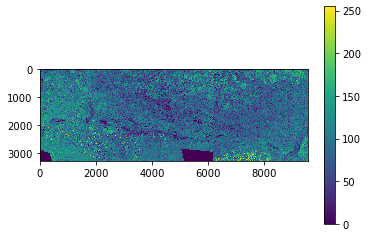

In [18]:
temp_fp = list(scratch_dir.glob("Beaufort/1998-99/Mosaics_1998-99/*.tif"))[0]

with rio.open(temp_fp) as src:
    beaufort_arr = src.read(1)
    
print("Beaufort sample file:", temp_fp)
print("metadata:", src.meta)

plt.imshow(beaufort_arr, interpolation="none")
plt.colorbar()
plt.show()

In [16]:
chukchi_arr

array([[28, 28, 28, ...,  0,  0,  0],
       [28, 28, 28, ...,  0,  0,  0],
       [28, 28, 28, ...,  0,  0,  0],
       ...,
       [28, 28, 28, ..., 28, 28, 28],
       [28, 28, 28, ..., 28, 28, 28],
       [28, 28, 28, ..., 28, 28, 28]], dtype=uint8)

In [17]:
beaufort_arr

array([[159, 100,  51, ...,  52,  47,   0],
       [ 89,  27,  73, ...,  87,  84,   0],
       [161,  80,  61, ..., 120,  93,   0],
       ...,
       [  0,   0,   0, ...,  40, 106,   0],
       [  0,   0,   0, ..., 117,  73,   0],
       [  0,   0,   0, ..., 117, 104,   0]], dtype=uint8)